<a href="https://colab.research.google.com/github/ggoddll99/ds_study/blob/main/240909_%EA%B3%BC%EC%A0%9C_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **4.2 경사 하강법**
경사 하강법(GD)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다. 경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.

짙은 안개 때문에 산속에서 길을 잃었다고 생각해보자. 발 밑 지면의 기울기만 느낄 수 있다. 빨리 골짜기로 내려가는 좋은 방법은 가장 가파른 길을 따라 아래로 내려가는 것이다. 이것이 바로 경사 하강법의 기본 원리이다. 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 그레디언트를 계산한다. 그리고 그레디언트가 감소하는 방향으로 진행한다. 그레디언트가 0이 되면 최솟값에 도달한 것이다.

구체적으로 보면 $\theta$를 임의의 값으로 시작해서 (무작위 초기화) 한 번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킨다(그림 4-3).

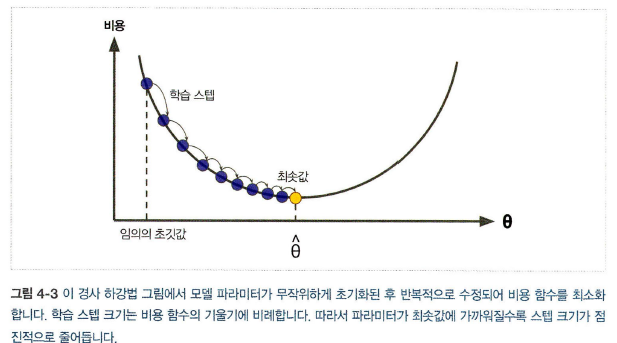

경사 하강법에서 중요한 파라미터는 스텝의 크기로, 학습률(learning rate) 하이퍼파라미터로 결정된다. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다(그림 4-4).

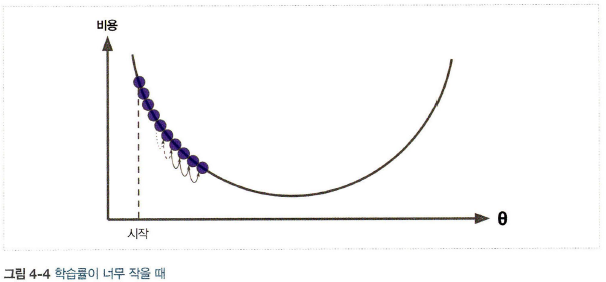

한편 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될지도 모른다. 이는 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 된다(그림 4-5).

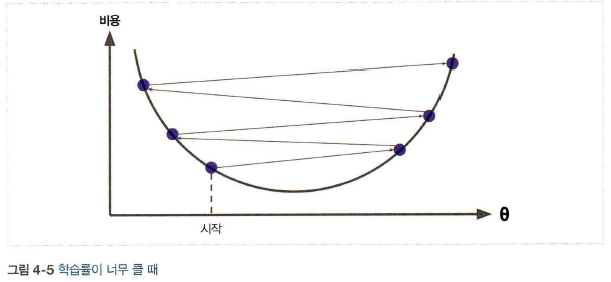

모든 비용 함수가 매끈한 그릇과 같지는 않다. 패인 곳, 산마루, 평지 등 특이한 지형이 있으면 최솟값으로 수렴하기 매우 어렵다. [그림 4-6]은 경사 하강법의 두가지 문제점을 보여준다. 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴한다. 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.

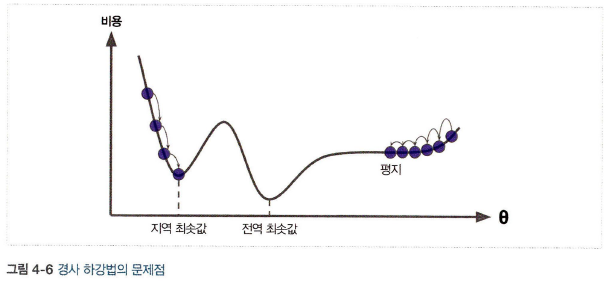

다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수이다. 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻이다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다. 이 두 사실로부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다(학습률이 너무 높지 않고 충분한 시간이 주어지면).

사실 비용 함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있다. [그림 4-7]은 특성 1과 특성 2의 스케일이 같은 훈련 세트(왼쪽)와 특성 1이 특성 2보다 더 작은 훈련 세트(오른쪽)에 대한 경사 하강법을 보여준다.

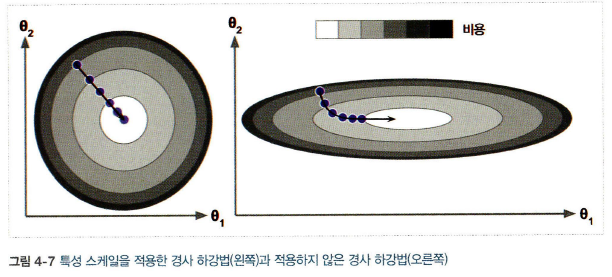

그림에서 볼 수 있듯이 왼쪽의 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달한다. 반면에 오른쪽 그래프는 처음엔 전역 최솟값의 방향에 거의 직각으로 향하다가 평편한 골짜기를 길게 돌아서 나간다. 결국 최솟값에 도달하겠지만 시간이 오래 걸릴 것이다.

경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다(예를 들면 사이킷런의 `StandardScaler`를 사용하여). 그렇지 않으면 수렴하는 데 훨씬 오래 걸린다.

앞의 그림은 모델 훈련이 (훈련 세트에서) 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일임을 설명해준다. 이를 모델의 파라미터 공간에서 찾는다고 말한다. 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워진다. 300차원의 건초더미에서 바늘을 찾는 것은 차원이 3개뿐일 때보다 훨씬 어렵다. 다행히 선형 회귀의 경우 비용 함수가 볼록 함수이기 때문에 이 바늘은 그릇의 맨 아래에 있을 것이다.

### **4.2.1 배치 경사 하강법**
경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그레디언트를 계산해야 한다. 다시 말해 $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 한다. 이를 편도함수라고 한다. 이는 '동쪽을 바라봤을 때 발 밑에 느껴지는 산의 기울기는 얼마인가?'와 같은 질문이다. 그리고 같은 질문을 북쪽에 대해서도 한다(3차원 이상의 세상이라 가정하면 다른 모든 차원에 대해서도 반복한다). [식 4-5]는 파라미터 $\theta_j$에 대한 비용 함수의 편도함수 $\frac{\sigma}{\sigma\theta_j}MSE(\theta)$이다.

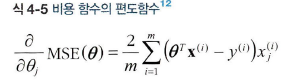

편도함수를 각각 계산하는 대신 [식 4-6]을 사용하여 한꺼번에 계산할 수 있다. 그레디언트 벡터 $\nabla_{\theta}MSE(\theta)$는 비용 함수의 (모델 파라미터마다 한 개씩인) 편도 함수를 모두 담고 있다.

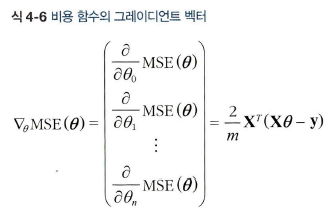

이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산한다. 그래서 이 알고리즘을 배치 경사 하강법이라고 한다. 즉, 매 스텝에서 훈련 데이터 전체를 사용한다. 이런 이유로 매우 큰 훈련 세트에서는 아주 느리다. 그러나 경사 하강법은 특성 수에 민감하지 않다. 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

위로 향하는 그레디언트 벡터가 구해지면 반대 방향인 아래로 가야 한다. $\theta$에서 $\nabla_{\theta}MSE(\theta)$는 비용 함수의 (모델 파라미터마다 한 개씩인) 편도함수를 모두 담고 있다.

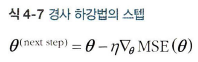

이 알고리즘을 간단히 구현해보자.

In [ ]:
eta=0.1 # 학습률
n_iterations=1000
m=100

theta=np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

계산된 theta를 확인해보자.

In [ ]:
theta

array([[3.97503556],
       [3.06599129]])

정규방정식으로 찾은 것과 정확히 같다. 경사 하강법이 완벽하게 작동했다. 학습률 $\eta$를 바꿔보자. [그림 4-8]은 세 가지 다른 학습률을 사용하여 진행한 경사 하강법의 스텝 처음 10개를 보여준다 (점선은 시작점을 나타낸다).

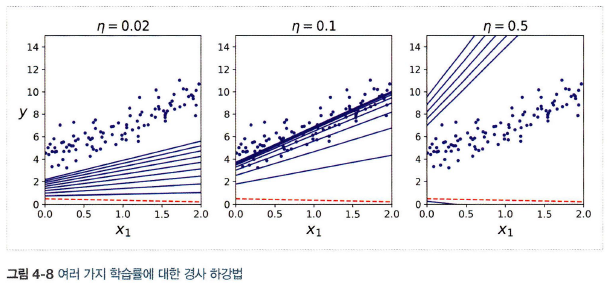

왼쪽 학습률이 너무 낮다. 알고리즘은 최적점에 도달하겠지만 시간이 오래 걸릴 것이다. 가운데는 학습률이 아주 적당해보인다. 반복 몇 번만에 이미 최적점에 수렴했다. 오른쪽은 학습률이 너무 높다. 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산한다.

적절한 학습률을 찾으려면 그리드 탐색을 사용한다. 하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다.

반복 횟수가 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈춘다. 너무 크면 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 된다. 간단한 해결책은 반복 횟수를 아주 크게 지정하고 그레디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 $\epsilon$ (허용오차) 보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘을 중지하는 것이다.

비용 함수가 볼록 함수이고 기울기가 급격하게 바뀌지 않는 경우, 학습률을 고정한 배치 경사 하강법은 어느 정도 시간이 걸리겠지만 결국 최적의 솔루션에 수렴할 것이다. 비용 함수의 모양에 따라 달라지겠지만 $\epsilon$ 범위 안에서 최적의 솔루션에 도달하기 위해서는 $O(1/\epsilon)$의 반복이 걸릴 수 있다. 다시 말해 허용 오차 $\epsilon$을 1/10으로 줄이면 알고리즘의 반복은 10배 늘어날 것이다.

### **4.2.2 확률적 경사 하강법**
배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레디언트를 계산한다는 사실이다. 훈련 세트가 커지면 매우 느려진다. 이와는 정반대로 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다. 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 확실히 훨씬 빠르다. 또한 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있다(SGD는 외부 메모리 학습 알고리즘으로 구현할 수 있다).

반면에 확률적이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정하다. 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하기 않고 위아래로 요동치면서 평균적으로 감소한다. 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못할 것이다(그림 4-9). 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아니다.

[그림 4-6]처럼 비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높다.

무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않다. 이 딜레마를 해결하는 한 가지 방법은 학습률을 점진적으로 감소시키는 것이다. 시작할 때는 학습률을 크게 하고 (수렴을 빠르게 하고 지역 최솟값에 빠지지 않게 한다). 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 된다. 이 과정은 금속공학 분야에서 가열한 금속을 천천히 냉각시키는 어닐링(풀림) 과정에서 영감을 얻은 담금질 기법 알고리즘과 유사하다. 매 반복에서 학습률을 결정하는 함수를 학습 스케쥴이라고 부른다. 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수도 있다. 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있다.

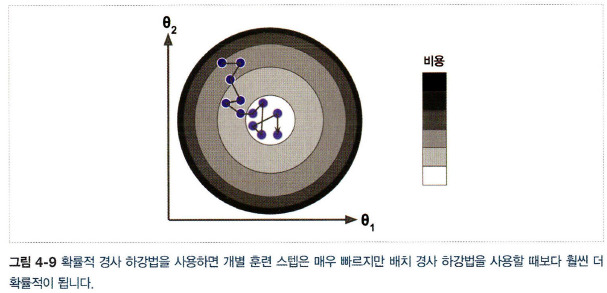

다음 코드는 간단한 학습 스케쥴을 사용한 확률적 경사 하강법의 구현이다.

In [ ]:
n_epochs=50
t0, t1=5, 50 # 학습 스케쥴 하이퍼파라미터

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients

일반적으로 한 반복에서 m번 되풀이되고, 이때 각 반복을 에포크라고 한다. 배치 경사 하강법 코드가 전체 훈련 세트에 대해 1,000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했다.

In [ ]:
theta

array([[3.94430837],
       [3.08980426]])

[그림 4-10]은 훈련 스텝의 첫 20개를 보여준다(스텝이 불규칙하게 진행한다).

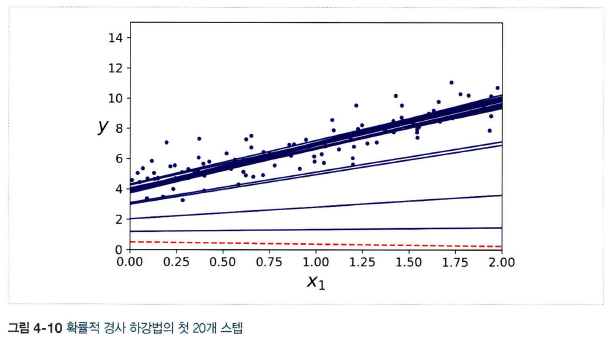

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있다. 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 (입력 특성과 레이블을 동일하게 섞어야 한다) 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다. 그러나 이렇게 하면 보통 더 늦게 수렴된다.

사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 `SGDRegressor` 클래스를 사용한다. 다음 코드는 최대 1,000번 에포크 동안 실행된다(`max_iter=1000`). 또는 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행된다(`tol=le-3`). 학습률 0.1(`eta0=0.1`)로 기본 학습 스케쥴을 사용한다. 규제는 전혀 사용하지 않았다(`penalty=None`).

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

여기에서도 정규방정식으로 구한 것과 매우 비슷한 값을 얻었다.

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.96342157]), array([3.06725743]))

### **4.2.3 미니배치 경사 하강법**
배치와 확률적 경사 하강법을 알고 있다면 이해하기 매우 쉽다. 각 스텝에서 전체 훈련 세트(배치 경사 하강법에서처럼)나 하나의 샘플(확률적 경사 하강법에서처럼)을 기반으로 그레디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산한다. 확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상이다.

특히 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이다. 하지만 지역 최솟값에서 빠져나오기는 더 힘들지도 모른다(선형 회귀와 같지 않고 지역 최솟값이 문제가 되는 경우). [그림 4-11]은 세 가지 경사 하강법 알고리즘이 훈련 과정동안 파라미터 공간에서 움직인 경로이다. 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌고 있다. 그렇지만 배치 경사 하강법에는 매 스텝에서 많은 시간이 소요되고, 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케쥴을 사용하면 최솟값에 도달한다는 것을 잊지 말아야 한다.

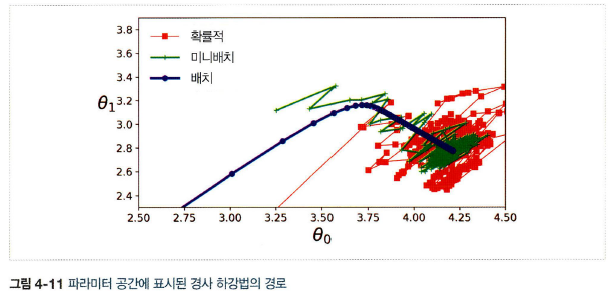

지금까지 논의한 알고리즘을 선형 회귀를 사용해 비교해보자(m은 훈련 샘플 수이고 n은 특성 수이다). [표 4-1] 참조.

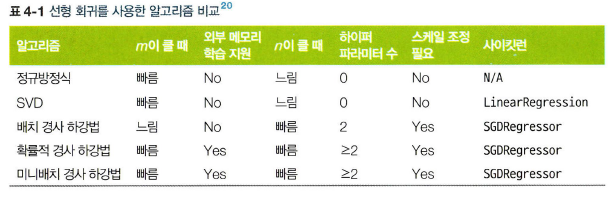

이 알고리즘들은 훈련 결과에 거의 차이가 없다. 모두 매우 비슷한 모델을 만들고 정확히 같은 방식으로 예측한다.

## **4.3 다항 회귀**
가지고 있는 데이터가 단순한 직선보다 복잡한 형태(비선형 데이터)여도 선형 모델을 사용할 수 있다. 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것이다. 이런 기법을 다항 회귀라고 한다.

예를 들어 간단한 2차방정식으로 비선형 데이터를 생성한다(약간의 잡음 포함).

In [ ]:
m=100
X=6*np.random.rand(m, 1)-3
y=0.5*X**2+X+2+np.random.randn(m, 1)

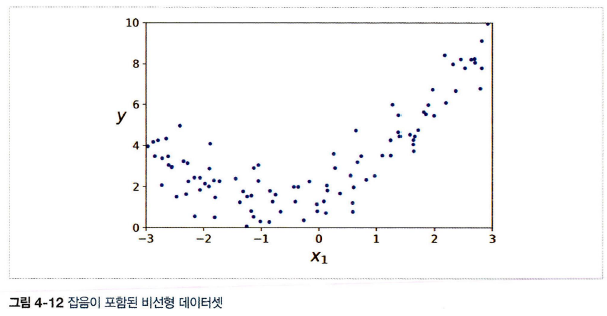

확실히 직선은 이 데이터에 잘 맞지 않을 것이다. 그러므로 사이킷런의 `PolynomialFeatures`를 사용해 훈련 데이터를 변환해보자. 훈련 세트에 있는 각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가한다(여기서는 특성 하나가 추가된다).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([-2.54355299])

In [ ]:
X_poly[0]

array([-2.54355299,  6.46966182])

`X_poly`는 이제 원래 특성 X와 이 특성의 제곱을 포함한다. 이 확장된 훈련 데이터에 `LinearRegression`을 적용해보자(그림 4-13).

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.96329198]), array([[0.96606944, 0.50509329]]))

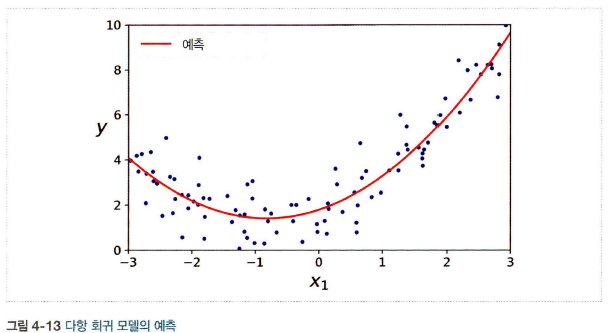

나쁘지 않다. 실제 원래 함수가 $y=0.5x^{2}_{1}+1.0x_1+2.0+가우시안 잡음$이고 예측된 모델은 $\hat{y}=0.56x^{2}_{1}+0.93x_1+1.78$이다.

특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다(일반적인 선형 회귀 모델에서는 하지 못한다). `PolynomialFeatures`가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문이다. 예를 들어 두 개의 특성 a, b가 있을 때 `degree=3`으로 `PolynomialFeatures`를 적용하면 a^2, a^3, b^2, b^3뿐만 아니라 ab, a^2b, ab^2도 특성으로 추가한다.

`PolynomialFeatures(degree=d)`는 특성이 n개인 배열을 특성이 $\frac{(n+d)!}{d!n!}$ 개인 배열로 변환한다.

## **4.4 학습 곡선**
고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다. 예를 들어 [그림 4-14]는 300차 다항 회귀 모델을 이전의 훈련 데이터에 적용한 것이다. 단순한 선형 모델이나 2차 모델(2차 다항 회귀 모델)과 결과를 비교해보자. 300차 다항 회귀 모델은 훈련 샘플에 가능한 한 가까이 가려고 구불구불하게 나타난다.

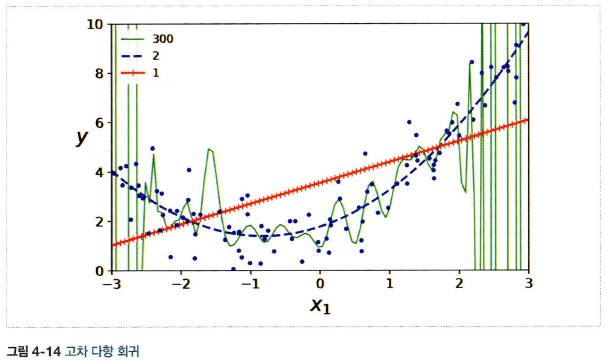

이 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합되었다. 반면에 선형 모델은 과소적합이다. 이 경우 가장 일반화가 잘될 모델은 2차 다항 회귀이다. 2차방정식으로 생성한 데이터이기 때문에 당연한 결과지만 일반적으로는 어떤 함수로 데이터가 생성됐는지 알 수 없다.

훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합된 것이다. 만약 양쪽에 모두 좋지 않으면 과소적합이다. 이때 모델이 너무 단순하거나 너무 복잡하다고 말한다.

또 다른 방법은 학습 곡선을 살펴보는 것이다. 이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다. 다음 코드는 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의한다.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)
    train_errors, val_errors=[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련 세트')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증 세트')

단순 선형 회귀 모델(직선)의 학습 곡선을 살펴보자(그림 4-15).

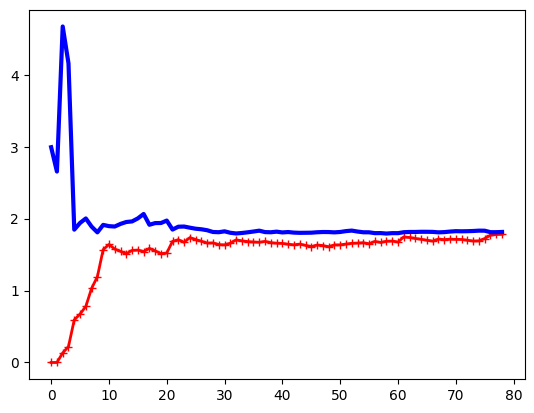

In [ ]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X, y)

먼저 훈련 데이터 성능을 보자. 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동한다. 하지만 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능해진다. 그래서 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승한다. 이 위치에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않는다. 그럼 이제 검증 데이터에 대한 모델의 성능을 보자. 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 크다. 모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다. 하지만 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워진다.

이 학습 곡선이 과소적합 모델의 전형적인 모습이다. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있다.

모델이 훈련 데이터에 과소적합되어 있다면 훈련 샘플을 더 추가해도 효과가 없다. 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 한다.

이제 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선을 그려보자(그림 4-16).

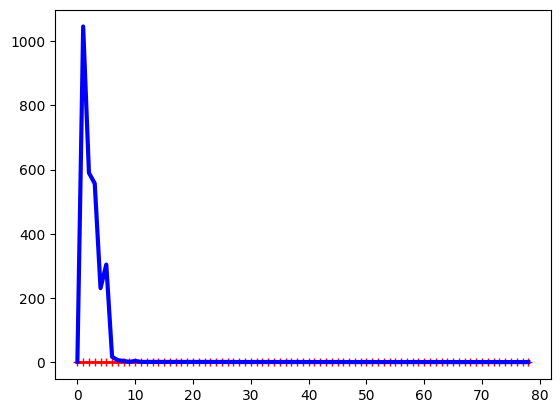

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

이 학습 곡선은 이전과 비슷해 보이지만 두 가지 매우 중요한 차이점이 있다.

* 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
* 두 곡선 사이에 공간이 있다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징이다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.

과대적합 모델을 개선하는 한 가지 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것이다.

**편향/분산 트레이드오프**

통계학과 머신러닝에서 나온 중요한 이론 하나는 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다는 사실이다.
* 편향 : 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것이다. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우이다. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽다.
* 분산 : 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타난다. 자유도가 높은 모델(예를 들면 고차 다항 회귀 모델)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있다.
* 줄일 수 없는 오차 : 데이터 자체에 있는 잡음 때문에 발생한다. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것이다.

모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어든다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다. 그래서 트레이드오프라고 부른다.

## **4.5 규제가 있는 선형 모델**
과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다(즉, 모델을 제한한다). 자유도를 줄이면 데이터에 과대적합되기 어려워진다. 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것이다.

선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다.

### **4.5.1 릿지 회귀**
릿지 회귀(티호노프 규제)는 규제가 추가된 선형 회귀 버전이다. 규제항이 비용 함수에 추가된다. 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력한다. 규제항은 훈련되는 동안에만 비용 함수에 추가된다. 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가한다.

일반적으로 훈련하는 동안 사용되는 비용 함수와 테스트에서 사용되는 성능 지표는 다르다. 규제를 떠나서 이들이 다른 이유는 훈련에 사용되는 비용 함수는 최적화를 위해 미분 가능해야 하기 때문이다. 반면 테스트에 사용되는 성능 지표는 최종 목표에 가능한 한 가까워야 한다. 로그 손실 같은 비용 함수를 사용하여 훈련시킨 분류기를 정밀도/재현율을 사용하여 평가하는 것이 좋은 예이다.

하이퍼파라미터 $\alpha$는 모델을 얼마나 많이 규제할지 조절한다. $\alpha=0$이면 릿지 회귀는 선형 회귀와 같아진다. $\alpha$가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다. [식 4-8]은 릿지 회귀의 비용 함수이다.

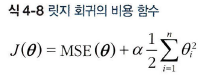

편향은 규제되지 않는다(합 기호가 i=0이 아니고 i=1에서 시작한다).

릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다. 규제가 있는 모델은 대부분 마찬가지이다.

[그림 4-17]은 선형 데이터에 몇 가지 다른 $\alpha$를 사용해 릿지 모델을 훈련시킨 결과이다. 왼쪽 그래프는 평범한 릿지 모델을 사용해 선형적인 예측을 만들었다. 오른쪽 그래프는 `PolynomialFeatures(degree=10)`을 사용해 먼저 데이터를 확장하고 `StandardScaler`를 사용해 스케일을 조정한 후 릿지 모델을 적용했다. 결국 이는 릿지 규제를 사용한 다항 회귀가 된다. $\alpha$를 증가시킬수록 직선에 가까워지는 것을 볼 수 있다. 즉, 모델의 분산은 줄지만 편향은 커지게 된다.

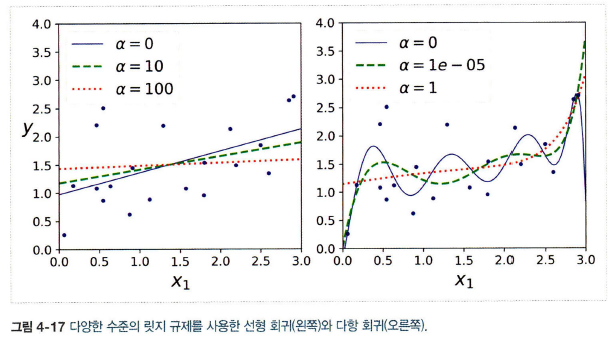

선형 회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있다. [식 4-9]는 정규방정식의 해이다(A는 편향에 해당하는 맨 왼쪽 위의 원소가 0인 $(n+1)\times(n+1)$의 단위행렬이다).

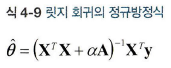

다음은 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예이다.

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg=Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.0924676]])

다음은 확률적 경사 하강법을 사용했을 때이다.

In [ ]:
sgd_reg=SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.08370583])

`penalty` 매개변수는 사용할 규제를 지정한다. `l2`는 SGD가 비용 함수에 가중치 벡터의 $l_2$ 노름의 제곱을 2로 나눈 규제항을 추가하게 만든다. 즉, 릿지 회귀와 같다.

### **4.5.2 라쏘 회귀**
릿지 회귀처럼 비용 함수에 규제항을 더하지만 $l_2$ 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 $l_1$ 노름을 사용한다(식 4-10).

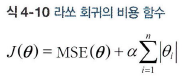

[그림 4-18]은 [그림 4-17]과 같지만 릿지 모델 대신 라쏘 모델과 조금 더 작은 $\alpha$ 값을 사용했다.

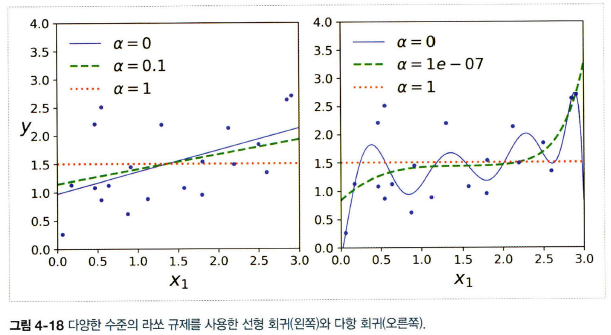

라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 점이다. 예를 들어 [그림 4-18]의 오른쪽 그래프에서 점선은 2차방정식처럼 보이며 거의 선형적이다. 차수가 높은 다항 특성의 가중치가 모두 0이 되었다. 다시 말해 라쏘 회귀는 자동으로 특성을 선택하고 희소 모델을 만든다.

[그림 4-19]를 보면 두 축은 모델 파라미터 두 개를 나타내고 배경의 등고선은 각기 다른 손실 함수를 나타낸다. 왼쪽 위 그래프의 등고선은 $l_1$ 손실을 나타낸다. 축에 가까워지면서 선형적으로 줄어든다.

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.05188412])

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.05281276])

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 준비
poly_scaler=Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

X_train_poly_scaled=poly_scaler.fit_transform(X_train)
X_val_poly_scaled=poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error=float('inf')
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel()) # 훈련을 이어서 진행한다.
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val, y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

In [ ]:
from sklearn import datasets

iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X=iris['data'][:, 3:] # 꽃잎의 너비
y=(iris["target"]==2).astype(int) # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

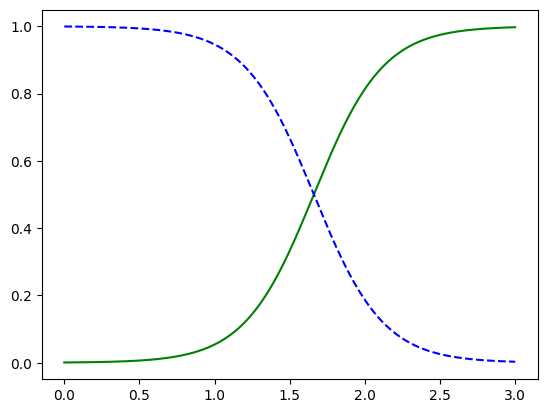

In [ ]:
X_new=np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not iris virginica')

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [ ]:
X=iris['data'][:, (2, 3)] # 꽃잎의 길이, 너비
y=iris['target']

softmax_reg=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])